In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
df = pd.read_csv('processed.cleveland.data', header=None)

print(df.head())


     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [8]:
# إضافة أسماء الأعمدة المناسبة للبيانات
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df.columns = columns

# استعراض البيانات بعد إضافة أسماء الأعمدة
print(df.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [10]:
# التحقق من القيم المفقودة في البيانات
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [37]:
X = df.drop('target' , axis = 1)
y = df['target']

In [39]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
print(df['target'].value_counts())

target
0    164
1    139
Name: count, dtype: int64


In [41]:
print(df.shape)
print(df.sample(5))
print(df.describe())


(303, 14)
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
145  47.0  1.0  3.0     108.0  243.0  0.0      0.0    152.0    0.0      0.0   
280  57.0  1.0  4.0     110.0  335.0  0.0      0.0    143.0    1.0      3.0   
153  55.0  1.0  4.0     160.0  289.0  0.0      2.0    145.0    1.0      0.8   
189  69.0  1.0  3.0     140.0  254.0  0.0      2.0    146.0    0.0      2.0   
5    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   

     slope   ca  thal  target  
145    1.0  0.0   3.0       1  
280    2.0  1.0   7.0       1  
153    2.0  1.0   7.0       1  
189    2.0  3.0   7.0       1  
5      1.0  0.0   3.0       0  
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   

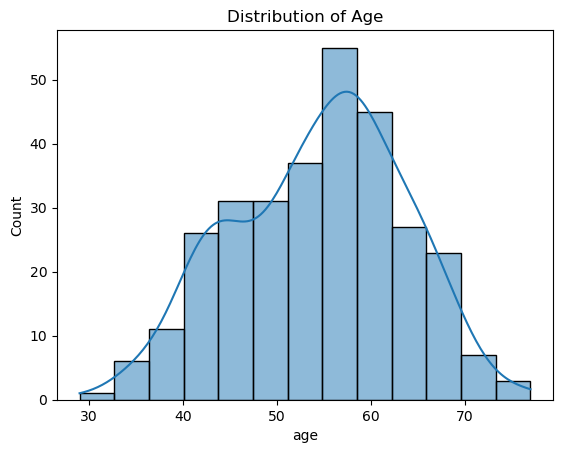

In [43]:
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

In [44]:
# التحقق من وجود قيم غير صالحة مثل '?'
print(df.isin(['?']).sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [45]:
# استبدال القيم '?' بالقيمة المتوسطة لكل عمود (يمكنك استبدالها بقيمة أخرى حسب الحاجة)
df.replace('?', np.nan, inplace=True)

# تحويل الأعمدة التي تحتوي على أرقام إلى نوع البيانات الرقمي
df = df.apply(pd.to_numeric, errors='coerce')

# استبدال القيم المفقودة بالقيمة المتوسطة لكل عمود
df.fillna(df.mean(), inplace=True)


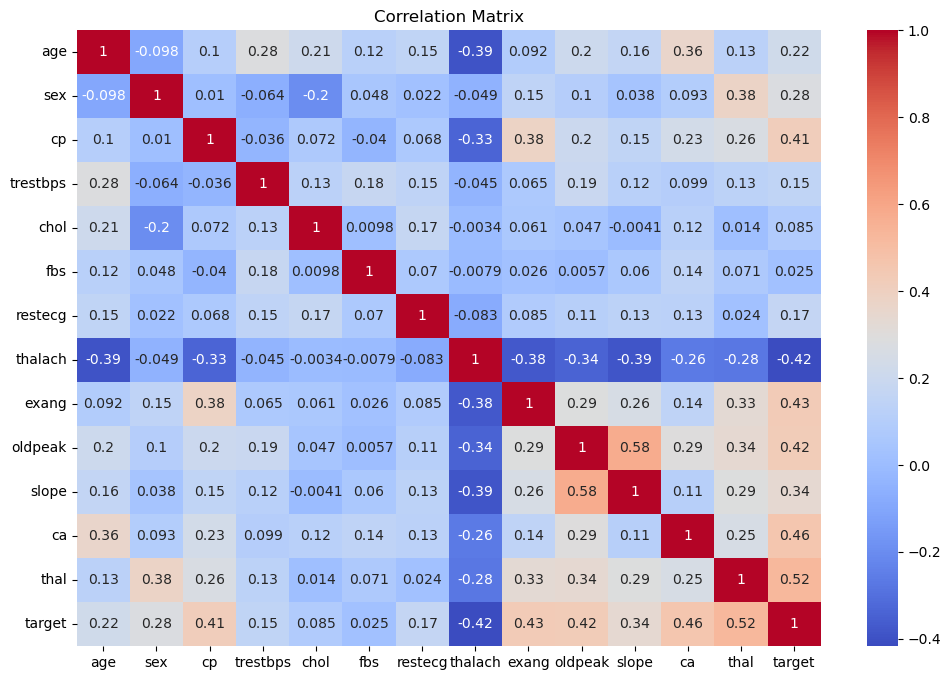

In [49]:
# رسم خريطة الارتباط بين المتغيرات بعد تنظيف البيانات
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


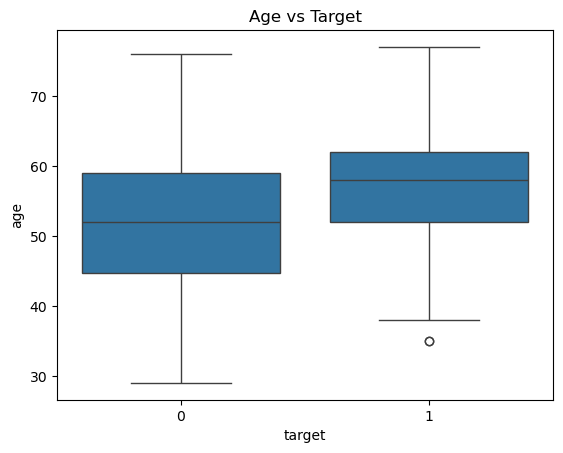

In [50]:
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs Target')
plt.show()


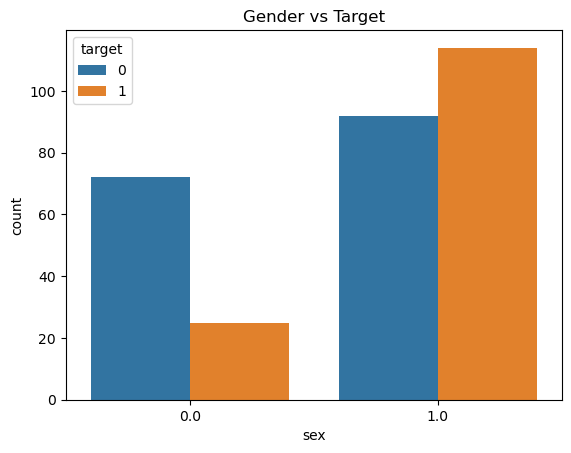

In [51]:
sns.countplot(x='sex', hue='target', data=df)
plt.title('Gender vs Target')
plt.show()


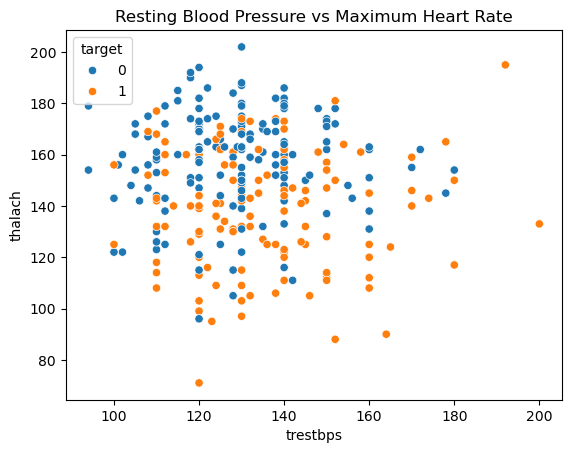

In [52]:
sns.scatterplot(x='trestbps', y='thalach', hue='target', data=df)
plt.title('Resting Blood Pressure vs Maximum Heart Rate')
plt.show()


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

from sklearn.metrics import classification_report, accuracy_score

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8852459016393442
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [65]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.7540983606557377
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.77      0.75      0.76        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



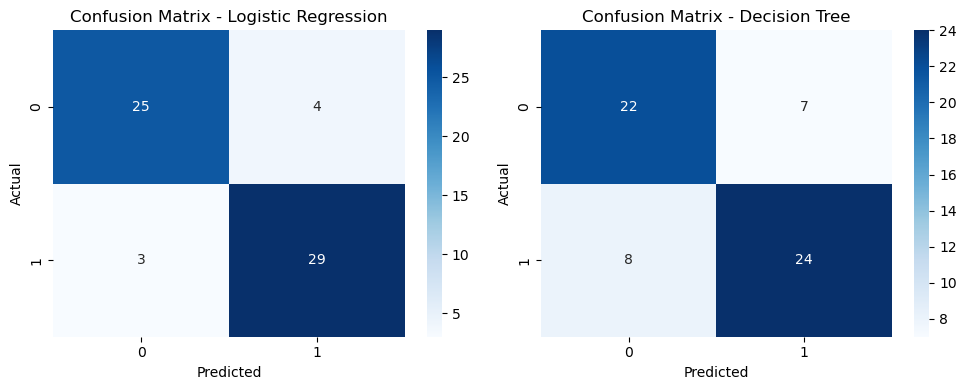

In [67]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)  # لتقسيم الرسم إلى رسمين جنبًا إلى جنب
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# رسم مصفوفة الارتباك لـ Decision Tree
plt.subplot(1, 2, 2)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# تحديد البارامترات التي تريد اختبارها
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# إنشاء نموذج Decision Tree مع GridSearch
tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# تدريب GridSearch على البيانات
grid_search.fit(X_train, y_train)

# عرض أفضل بارامترات وأفضل دقة
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# استخدام النموذج المحسن لتوقع النتائج على مجموعة الاختبار
y_pred_optimized_tree = grid_search.best_estimator_.predict(X_test)

# تقييم النموذج المحسن
from sklearn.metrics import accuracy_score, classification_report

print("Optimized Decision Tree Accuracy:", accuracy_score(y_test, y_pred_optimized_tree))
print("Optimized Decision Tree Classification Report:\n", classification_report(y_test, y_pred_optimized_tree))


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Accuracy: 0.7562925170068027
Optimized Decision Tree Accuracy: 0.7540983606557377
Optimized Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.76        29
           1       0.81      0.69      0.75        32

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61

